# OCR with EasyOCR

- Supported by [Jaided AI](https://jaided.ai/)
- Official repository: https://github.com/JaidedAI/EasyOCR

# Instalation

In [1]:
# !pip install easyocr

In [2]:
# !pip uninstall opencv-python-headless
# !pip install opencv-python-headless==4.1.2.30

In [4]:
from easyocr import Reader
import cv2
from PIL import ImageFont, ImageDraw, Image
import numpy as np
import matplotlib.pyplot as plt

# Parameters

In [5]:
languages_list = ['en', 'pt']
print(languages_list)

['en', 'pt']


In [6]:
gpu = True

(-0.5, 749.5, 479.5, -0.5)

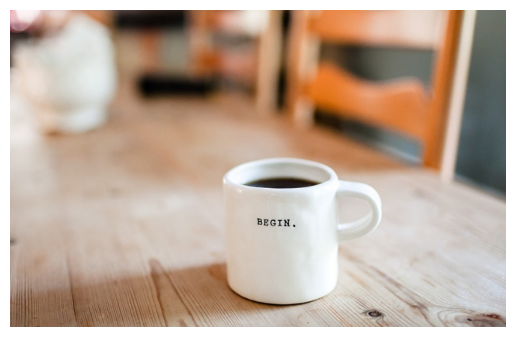

In [10]:
img_original= cv2.imread('Images/cup.jpg')
img = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")

In [11]:
original = img.copy()

# Text recognition

In [12]:
reader = Reader(languages_list, gpu)
results = reader.readtext(img)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

/home/aispark/Project/OCR_Project/.venv/lib/python3.12/site-packages/torch/cuda/__init__.py:283: UserWarning: 
    Found GPU0 NVIDIA GB10 which is of cuda capability 12.1.
    Minimum and Maximum cuda capability supported by this version of PyTorch is
    (8.0) - (12.0)
    
  warnings.warn(


In [13]:
results

[([[373, 313], [435, 313], [435, 331], [373, 331]],
  'BEGIN .',
  0.9773951790128487)]

# Writing the results

## Text

In [14]:
font = 'Fonts/calibri.ttf'

In [15]:
def write_text(text, x, y, img, font, color=(50,50,255), font_size=22):
  font = ImageFont.truetype(font, font_size)
  img_pil = Image.fromarray(img)
  draw = ImageDraw.Draw(img_pil)
  draw.text((x, y - font_size), text, font = font, fill = color)
  img = np.array(img_pil)
  return img

## Bouding box

* **lt** = left top
* **rt** = rigth top
* **br** = bottom right
* **bl** = bottom left

In [16]:
def box_coordinates(box):
  (lt, rt, br, bl) = box
  lt = (int(lt[0]), int(lt[1]))
  rt = (int(rt[0]), int(rt[1]))
  br = (int(br[0]), int(br[1]))
  bl = (int(bl[0]), int(bl[1]))
  return lt, rt, br, bl

In [17]:
results[0][0]

[[373, 313], [435, 313], [435, 331], [373, 331]]

In [18]:
box_coordinates(results[0][0])

((373, 313), (435, 313), (435, 331), (373, 331))

In [19]:
def draw_img(img, lt, br, color=(200,255,0),thickness=2):
  cv2.rectangle(img, lt, br, color, thickness)
  return img

[[373, 313], [435, 313], [435, 331], [373, 331]] BEGIN . 0.9773951790128487


(-0.5, 749.5, 479.5, -0.5)

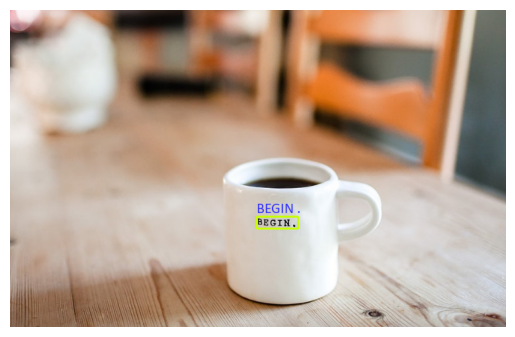

In [20]:
img = original.copy()
for (box, text, probability) in results:
  print(box, text, probability)
  lt, rt, br, bl = box_coordinates(box)
  img = draw_img(img, lt, br)
  img = write_text(text, lt[0], lt[1], img, font)
plt.imshow(img)
plt.axis("off")

In [26]:
img_original = cv2.imread('Images/google-cloud.jpg')
img = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
reader = Reader(languages_list, gpu)
results = reader.readtext(img)
results

[([[910, 412], [1034, 412], [1034, 468], [910, 468]],
  '1170',
  0.8825415968894958),
 ([[566, 454], [845, 454], [845, 520], [566, 520]],
  'Google Cloud',
  0.9973458734079448)]

(-0.5, 1118.5, 745.5, -0.5)

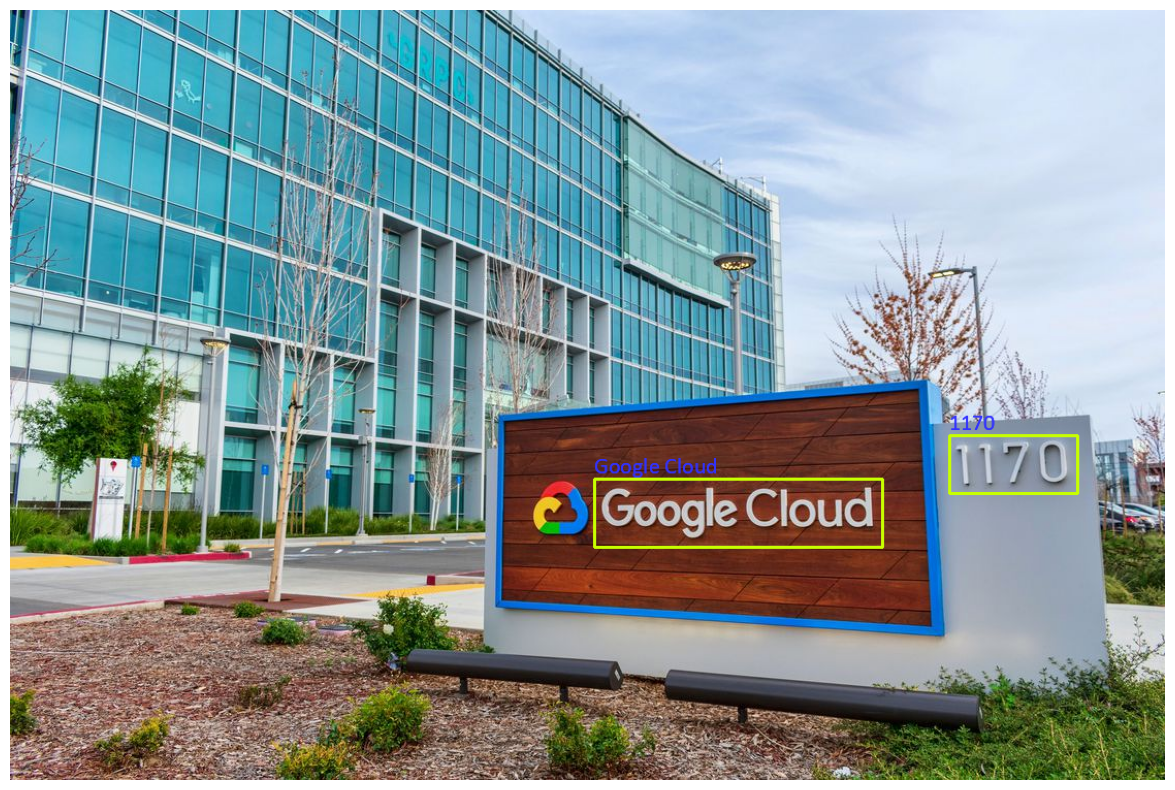

In [28]:
for (box, text, probability) in results:
  lt, rt, br, bl = box_coordinates(box)
  img = draw_img(img, lt, br)
  img = write_text(text, lt[0], lt[1], img, font)
plt.figure(figsize=(20, 10))
plt.imshow(img)
plt.axis("off")

# Other languages

- Documentation: https://www.jaided.ai/easyocr/

In [29]:
languages_list = ['en','fr']
languages_list

['en', 'fr']

In [31]:
img_original = cv2.imread('Images/french.jpg')
img = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
reader = Reader(languages_list, gpu)
results = reader.readtext(img)
results

[([[216, 122], [370, 122], [370, 170], [216, 170]],
  'Mairie du /"',
  0.7750279869952912),
 ([[257, 222], [378, 222], [378, 272], [257, 272]],
  '[Palais du',
  0.9455871479621349),
 ([[242, 322], [515, 322], [515, 376], [242, 376]],
  'LES ARTS DÉCORATIFS',
  0.9756625963529255),
 ([[262, 440], [481, 440], [481, 492], [262, 492]],
  'Musée du LOUVRE',
  0.9962170692850162),
 ([[197, 537], [282, 537], [282, 577], [197, 577]],
  'Théâtre',
  0.9997589813902271),
 ([[194, 567], [380, 567], [380, 616], [194, 616]],
  'du PALAIS-RoyalL',
  0.5816957671784141),
 ([[377.02985749985464, 236.11942999941868],
   [475.90943152163265, 248.1536282272754],
   [468.97014250014536, 283.8805700005813],
   [371.09056847836735, 270.8463717727246]],
  'LOUVRE',
  0.6363169800877272)]

(-0.5, 691.5, 754.5, -0.5)

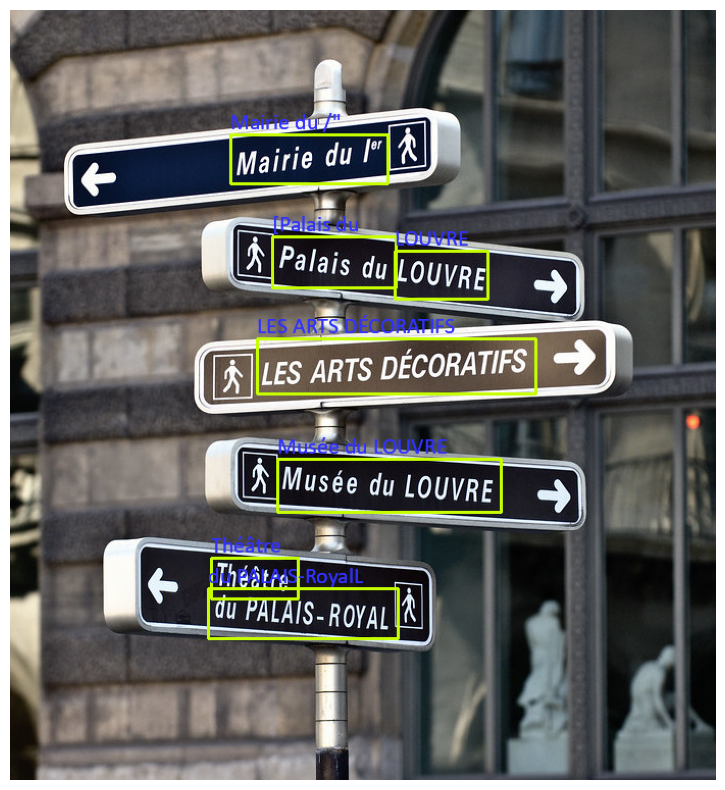

In [33]:
for (box, text, probability) in results:
  lt, rt, br, bl = box_coordinates(box)
  img = draw_img(img, lt, br)
  img = write_text(text, lt[0], lt[1], img, font)
plt.figure(figsize=(20, 10))
plt.imshow(img)
plt.axis("off")

In [37]:
languages_list = ['en', 'ch_sim']
languages_list

['en', 'ch_sim']

In [38]:
font = 'Fonts//simsun.ttc'

In [39]:
img_original = cv2.imread('Images/chinese.jpg')
img = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
reader = Reader(languages_list, gpu)
results = reader.readtext(img)
results

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[87, 81], [133, 81], [133, 125], [87, 125]], '西', 0.96131558018104),
 ([[189, 75], [467, 75], [467, 165], [189, 165]], '愚园路', 0.961067363298541),
 ([[515, 81], [565, 81], [565, 123], [515, 123]], '东', 0.9939906550929578),
 ([[78, 126], [136, 126], [136, 156], [78, 156]], '315', 0.9999936680552679),
 ([[514, 124], [574, 124], [574, 156], [514, 156]], '309', 0.9999794211992603),
 ([[79, 173], [125, 173], [125, 213], [79, 213]], 'W', 0.5153255231010831),
 ([[226, 170], [414, 170], [414, 220], [226, 220]],
  'Yuyuan Rd。',
  0.8517651542258521),
 ([[529, 173], [569, 173], [569, 213], [529, 213]], 'E', 0.46748199401059765)]

(-0.5, 639.5, 338.5, -0.5)

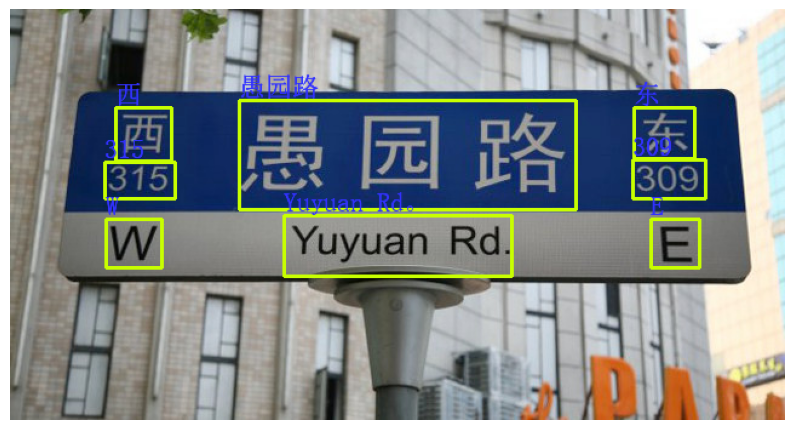

In [42]:
for (box, text, probability) in results:
  lt, rt, br, bl = box_coordinates(box)
  img = draw_img(img, lt, br)
  img = write_text(text, lt[0], lt[1], img, font)
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis("off")

# Text with background

In [43]:
def text_background(text, x, y, img, font, font_size=32, color=(200,255,0)):
  background = np.full((img.shape), (0,0,0), dtype=np.uint8)
  text_back = write_text(text, x, y, background, font, font_size=font_size)
  text_back = cv2.dilate(text_back, (np.ones((3,5), np.uint8)))
  fx, fy, fw, fh = cv2.boundingRect(text_back[:,:,2])
  cv2.rectangle(img, (fx, fy), (fx + fw, fy + fh), color, -1)
  return img

In [ ]:
font = 'Fonts//calibri.ttf'
languages_list = ['en', 'pt']

In [44]:
img_original = cv2.imread('Images//plate-information.jpg')
img = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
reader = Reader(languages_list, gpu)
results = reader.readtext(img)
results

[([[260, 164], [302, 164], [302, 196], [260, 196]], '310', 0.9998603543356113),
 ([[344, 186], [368, 186], [368, 212], [344, 212]], '1', 0.3758503804690214),
 ([[134, 262], [180, 262], [180, 290], [134, 290]], 'Cine', 0.993945837020874),
 ([[303.98198161801105, 128.78017977981216],
   [366.5033938292552, 117.34681539577487],
   [371.01801838198895, 144.21982022018784],
   [308.4966061707448, 155.65318460422512]],
  'Uniao',
  0.9944476504825075),
 ([[202.05825797292724, 154.41165159458544],
   [304.69489618352634, 132.68184425805777],
   [309.94174202707273, 157.58834840541456],
   [207.3051038164737, 180.31815574194223]],
  ' Ferroviaria',
  0.6833978577467643),
 ([[132.65739357167092, 171.12591485733674],
   [208.5373938916925, 155.3994900067786],
   [214.34260642832908, 182.87408514266326],
   [138.4626061083075, 199.6005099932214]],
  'Estacao',
  0.992071764138454),
 ([[183.7701175612585, 185.99310580513264],
   [261.70640266490693, 174.705633508088],
   [265.2298824387415, 199.00

(-0.5, 506.5, 433.5, -0.5)

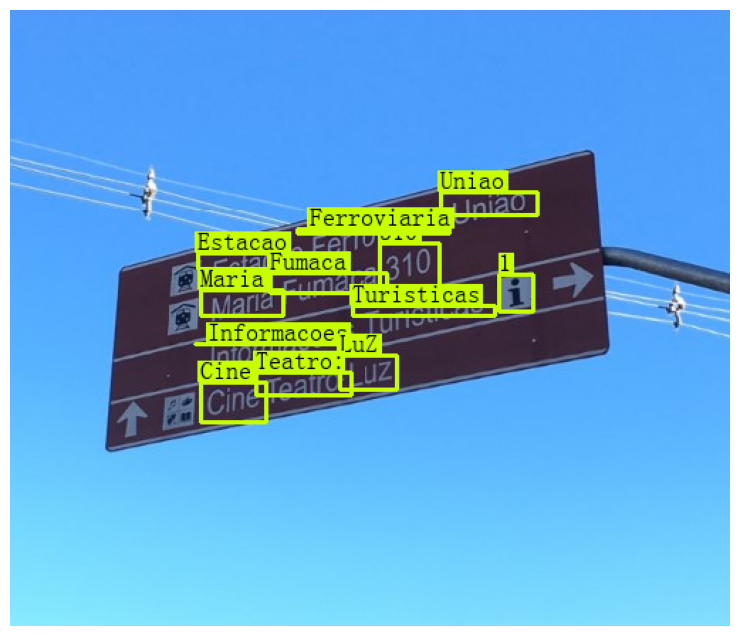

In [48]:
for (box, text, probability) in results:
  lt, rt, br, bl = box_coordinates(box)
  img = draw_img(img, lt, br, (200,255,0))
  img = text_background(text, lt[0], lt[1], img, font, 18, (200,255,0))
  img = write_text(text, lt[0], lt[1], img, font, (0,0,0), 18)
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis("off")